In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def parse_event(event):
    state = event[:2]
    climateRegion = event[2]
    season = event[3]
    buildingNo = int(event[4:6])
    startDate = pd.to_datetime(event[6:]).strftime('%Y-%m-%d')

    return state, climateRegion, season, buildingNo, startDate

def fix_event(df):
    eventList = df['EVENT'].tolist()
    df[['EVENT', 'EVENT1']] = df['EVENT'].str.split('-', expand=True)
    return df

def change_to_UTF8(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype(str).apply(lambda x: x.encode('utf-8').decode('utf-8'))
    return df

In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/Bida670/OneDrive_2025-02-13.zip' .
!cp '/content/drive/MyDrive/Colab Notebooks/Bida670/cb_2018_us_state_500k.zip' .
!cp '/content/drive/MyDrive/Colab Notebooks/Bida670/cb_2018_us_nation_20m.zip' .

In [ ]:
!unzip OneDrive_2025-02-13.zip

Archive:  OneDrive_2025-02-13.zip
 extracting: BASE CD/BASE Study Data Dictionary.xls  
 extracting: BASE CD/DATA/DBF/MTR/aldehyde.dbf  
 extracting: BASE CD/DATA/DBF/MTR/aldspike.dbf  
 extracting: BASE CD/DATA/DBF/MTR/antigen.dbf  
 extracting: BASE CD/DATA/DBF/MTR/bactair.dbf  
 extracting: BASE CD/DATA/DBF/MTR/bactdry.dbf  
 extracting: BASE CD/DATA/DBF/MTR/bactwet.dbf  
 extracting: BASE CD/DATA/DBF/MTR/biologic.dbf  
 extracting: BASE CD/DATA/DBF/MTR/co.dbf  
 extracting: BASE CD/DATA/DBF/MTR/co2.dbf  
 extracting: BASE CD/DATA/DBF/MTR/fixed.dbf  
 extracting: BASE CD/DATA/DBF/MTR/fungair.dbf  
 extracting: BASE CD/DATA/DBF/MTR/fungdry.dbf  
 extracting: BASE CD/DATA/DBF/MTR/fungspor.dbf  
 extracting: BASE CD/DATA/DBF/MTR/fungwet.dbf  
 extracting: BASE CD/DATA/DBF/MTR/hvacco2.dbf  
 extracting: BASE CD/DATA/DBF/MTR/light.dbf  
 extracting: BASE CD/DATA/DBF/MTR/mobile.dbf  
 extracting: BASE CD/DATA/DBF/MTR/multsorb.dbf  
 extracting: BASE CD/DATA/DBF/MTR/notemtr.dbf  
 extracti

In [ ]:
!unzip cb_2018_us_state_500k.zip

Archive:  cb_2018_us_state_500k.zip
  inflating: cb_2018_us_state_500k.shp.ea.iso.xml  
  inflating: cb_2018_us_state_500k.shp.iso.xml  
  inflating: cb_2018_us_state_500k.shp  
  inflating: cb_2018_us_state_500k.shx  
  inflating: cb_2018_us_state_500k.dbf  
  inflating: cb_2018_us_state_500k.prj  
 extracting: cb_2018_us_state_500k.cpg  


In [ ]:
fungair_path = '/content/BASE CD/DATA/SAS/MTR/fungair.sas7bdat'
bactair_path = '/content/BASE CD/DATA/SAS/MTR/bactair.sas7bdat'
voc_path = '/content/BASE CD/DATA/SAS/MTR/voc.sas7bdat'
filea1_path = '/content/BASE CD/DATA/SAS/SVY/filea1.sas7bdat'
surv_path = '/content/BASE CD/DATA/SAS/QSN/survey.sas7bdat'

In [ ]:
fungairdf = pd.read_sas(fungair_path, format = 'sas7bdat', encoding="utf-8")
bactairdf = pd.read_sas(bactair_path, format = 'sas7bdat')
change_to_UTF8(bactairdf)
vocdf = pd.read_sas(voc_path, format = 'sas7bdat', encoding="utf-8")
filea1df = pd.read_sas(filea1_path, format = 'sas7bdat')
change_to_UTF8(filea1df)
survdf = pd.read_sas(surv_path, format = 'sas7bdat', encoding="utf-8")
fix_event(survdf)

<ipython-input-10-fd6051634e81>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[['EVENT', 'EVENT1']] = df['EVENT'].str.split('-', expand=True)


,SURVEYCD,YEARS,MONTHS,HOURS,DAYS,WSLOCAT,WSLOCAT2,WSPOP,WSCARPET,WSCLEAN,...,HEALTH,PERSTRES,JOBDISSA,MANAGEME,DUST_DIR,CLUTTER,MAINTAIN,MISC_OTH,EVENT,EVENT1
0,4701,9.0,NaN,40.0,4.0,4,NaN,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARFW01980309,014701
1,4702,7.0,NaN,25.0,3.0,3,NaN,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARFW01980309,014702
2,4703,25.0,NaN,25.0,2.0,1,NaN,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARFW01980309,014703
3,4704,11.0,NaN,40.0,4.0,1,NaN,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARFW01980309,014704
4,4705,23.0,NaN,40.0,4.0,5,7,3,2,4,...,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARFW01980309,014705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4321,3579,4.0,NaN,40.0,5.0,2,NaN,2,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WAIW04970310,013579
4322,3580,4.0,NaN,50.0,4.0,3,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WAIW04970310,013580
4323,3581,5.0,NaN,40.0,3.0,2,NaN,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WAIW04970310,013581
4324,3582,1.0,NaN,45.0,5.0,3,NaN,4,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WAIW04970310,013582


In [ ]:
print("fungair file")
print(fungairdf.head())
print("bactair file")
print(bactairdf.head())
print("voc file")
print(vocdf.head())
print("filea1 file")
print(filea1df.head())
print("survey file")
print(survdf.head())

fungair file
   CONCENTR  DETECTIO PERIOD               FUNG_GRP         EVENT   SAMPLEID  \
0     -96.0     -96.0    NaN             ACREMONIUM  ARFW01980309  EHFUN3173   
1     -96.0     -96.0    NaN             ALTERNARIA  ARFW01980309  EHFUN3173   
2     -96.0     -96.0    NaN      ASPERGILLUS OTHER  ARFW01980309  EHFUN3173   
3     -96.0     -96.0    NaN     ASPERGILLUS FLAVUS  ARFW01980309  EHFUN3173   
4     -96.0     -96.0    NaN  ASPERGILLUS FUMIGATUS  ARFW01980309  EHFUN3173   

   VOLUME  TOTAL1  TOTAL2  TIME         COMMENTS SITEID CLASS  
0     0.0   -97.0   -96.0   0.0  F1  FIELD BLANK    NaN   NaN  
1     0.0   -97.0   -96.0   0.0  F1  FIELD BLANK    NaN   NaN  
2     0.0   -97.0   -96.0   0.0  F1  FIELD BLANK    NaN   NaN  
3     0.0   -97.0   -96.0   0.0  F1  FIELD BLANK    NaN   NaN  
4     0.0   -97.0   -96.0   0.0  F1  FIELD BLANK    NaN   NaN  
bactair file
   CONCENTR  DETECTIO PERIOD   BACT_GRP COMMENTS   SAMPLEID  INCUBATI  VOLUME  \
0     -97.0  7.042254     AM

In [ ]:
print("fungair file")
print(fungairdf.info())
print("bactair file")
print(bactairdf.info())
print("voc file")
print(vocdf.info())
print("filea1 file")
print(filea1df.info())
print("survey file")
print(survdf.info())

fungair file
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79650 entries, 0 to 79649
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CONCENTR  79650 non-null  float64
 1   DETECTIO  79650 non-null  float64
 2   PERIOD    73256 non-null  object 
 3   FUNG_GRP  79650 non-null  object 
 4   EVENT     79650 non-null  object 
 5   SAMPLEID  79650 non-null  object 
 6   VOLUME    79650 non-null  float64
 7   TOTAL1    79650 non-null  float64
 8   TOTAL2    79650 non-null  float64
 9   TIME      79650 non-null  float64
 10  COMMENTS  79650 non-null  object 
 11  SITEID    73256 non-null  object 
 12  CLASS     73256 non-null  object 
dtypes: float64(6), object(7)
memory usage: 7.9+ MB
None
bactair file
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36407 entries, 0 to 36406
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CONCENTR  36407 non-null  float

In [ ]:
dfs = [vocdf, bactairdf]

merged_df = dfs[0]
for i in range(1, len(dfs)):
    merged_df = pd.merge(merged_df, dfs[i], on='EVENT', how='outer')

print(merged_df)

         SAMPLEID_x         LABID  DILUENT      CAS                 COMPOUND  \
0         EHCAN1060  P9800413-001      0.0  75-71-8  DICHLORODIFLUOROMETHANE   
1         EHCAN1060  P9800413-001      0.0  75-71-8  DICHLORODIFLUOROMETHANE   
2         EHCAN1060  P9800413-001      0.0  75-71-8  DICHLORODIFLUOROMETHANE   
3         EHCAN1060  P9800413-001      0.0  75-71-8  DICHLORODIFLUOROMETHANE   
4         EHCAN1060  P9800413-001      0.0  75-71-8  DICHLORODIFLUOROMETHANE   
...             ...           ...      ...      ...                      ...   
12499251  EHCAN0623  P9702651-007      0.0      NaN             TVOC (Other)   
12499252  EHCAN0623  P9702651-007      0.0      NaN             TVOC (Other)   
12499253  EHCAN0623  P9702651-007      0.0      NaN             TVOC (Other)   
12499254  EHCAN0623  P9702651-007      0.0      NaN             TVOC (Other)   
12499255  EHCAN0623  P9702651-007      0.0      NaN             TVOC (Other)   

          MASS  CONCENT1  CONCENT2  DET

In [ ]:
survdf

,SURVEYCD,YEARS,MONTHS,HOURS,DAYS,WSLOCAT,WSLOCAT2,WSPOP,WSCARPET,WSCLEAN,...,HEALTH,PERSTRES,JOBDISSA,MANAGEME,DUST_DIR,CLUTTER,MAINTAIN,MISC_OTH,EVENT,EVENT1
0,4701,9.0,NaN,40.0,4.0,4,NaN,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARFW01980309,014701
1,4702,7.0,NaN,25.0,3.0,3,NaN,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARFW01980309,014702
2,4703,25.0,NaN,25.0,2.0,1,NaN,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARFW01980309,014703
3,4704,11.0,NaN,40.0,4.0,1,NaN,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARFW01980309,014704
4,4705,23.0,NaN,40.0,4.0,5,7,3,2,4,...,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARFW01980309,014705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4321,3579,4.0,NaN,40.0,5.0,2,NaN,2,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WAIW04970310,013579
4322,3580,4.0,NaN,50.0,4.0,3,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WAIW04970310,013580
4323,3581,5.0,NaN,40.0,3.0,2,NaN,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WAIW04970310,013581
4324,3582,1.0,NaN,45.0,5.0,3,NaN,4,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WAIW04970310,013582


In [ ]:
df[df["FUNG_GRP"] == 'PENICILLIUM']

,CONCENTR,DETECTIO,PERIOD,FUNG_GRP,EVENT,SAMPLEID,VOLUME,TOTAL1,TOTAL2,TIME,COMMENTS,SITEID,CLASS
20,-96.0,-96.000000,NaN,PENICILLIUM,ARFW01980309,EHFUN3173,0.000,-97.0,-96.0,0.0,F1 FIELD BLANK,NaN,NaN
53,-96.0,-96.000000,NaN,PENICILLIUM,ARFW01980309,EHFUN3193,0.000,-97.0,-96.0,0.0,F1 SHIPPING BLANK,NaN,NaN
86,-97.0,7.042254,AM,PENICILLIUM,ARFW01980309,EHFUN3166,0.142,1.0,7.0,5.0,F5,EHFIX0005,PRIMARY
119,7.0,7.042254,AM,PENICILLIUM,ARFW01980309,EHFUN3167,0.142,3.0,21.0,5.0,F5 DUPLICATE,EHFIX0005,DUPLICATE
152,-97.0,7.042254,AM,PENICILLIUM,ARFW01980309,EHFUN3172,0.142,1.0,7.0,5.0,F1,EHFIX0001,PRIMARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79525,19.0,17.543860,PM,PENICILLIUM,WAIW04970310,EHFUN1810,0.057,22.0,389.0,2.0,F0 DUPLICATE positive hole conversion= 22/21,EHFIX0000,DUPLICATE
79554,-97.0,17.543860,PM,PENICILLIUM,WAIW04970310,EHFUN1813,0.057,-97.0,-97.0,2.0,F1,EHFIX0001,PRIMARY
79583,18.0,17.543860,PM,PENICILLIUM,WAIW04970310,EHFUN1816,0.057,2.0,35.0,2.0,F5,EHFIX0005,PRIMARY
79612,-97.0,17.543860,PM,PENICILLIUM,WAIW04970310,EHFUN1817,0.057,1.0,18.0,2.0,F5 DUPLICATE,EHFIX0005,DUPLICATE


In [ ]:
eventList = df['EVENT'].tolist()

In [ ]:
stateList = []
climateRegionList = []
seasonList = []
buildingNoList = []
startDateList = []
for event in eventList:
    state, climateRegion, season, buildingNo, startDate = parse_event(event)
    stateList.append(state)
    climateRegionList.append(climateRegion)
    seasonList.append(season)
    buildingNoList.append(buildingNo)
    startDateList.append(startDate)
df3 = df.copy()
df3['STUSPS'] = stateList
df3['climateRegion'] = climateRegionList
df3['season'] = seasonList
df3['buildingNo'] = buildingNoList
df3['startDate'] = startDateList

In [ ]:
df3.columns.tolist()
df_concentration = df3.iloc[:,[0, 13, 15]]
df_concentration.head()
grouped_data = df_concentration.groupby(['STUSPS'])

In [ ]:
gdf = gpd.read_file("/content/cb_2018_us_state_500k.shp")



In [ ]:
merged_gdf = gdf.merge(df_concentration.groupby(['STUSPS']).max(), on="STUSPS", how="left")

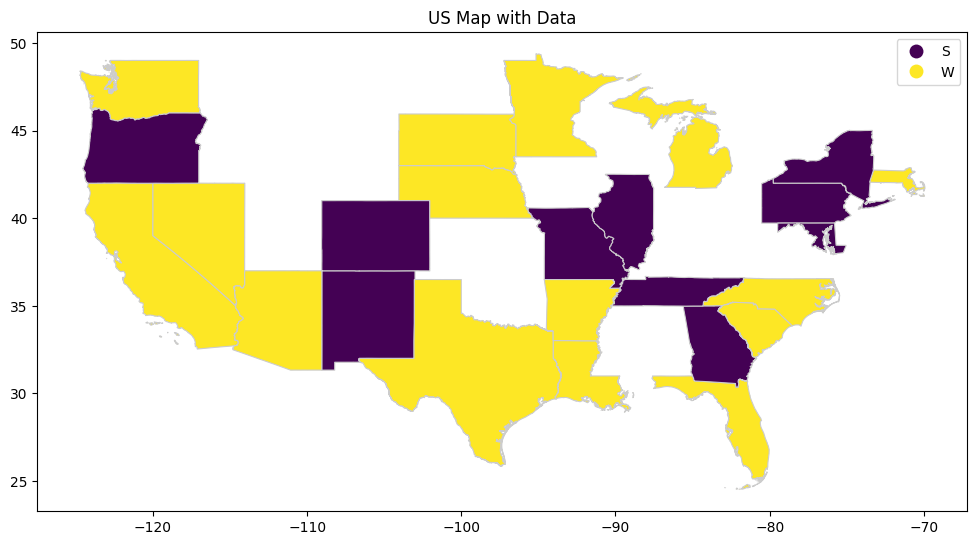

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_gdf.plot(column="CONCENTR", cmap="viridis", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.set_title("US Map with Data")
plt.show()

CONCENTR


In [ ]:
grouped_data

In [ ]:
merged_gdf.dropna().head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,CONCENTR,season
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",7008.0,W
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.8677 29.86155, -88.86566 2...",1750.0,W
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",503.0,W
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...",476.0,W
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",1583.0,W
